In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import vapeplot 
from scipy import interp
import scipy.stats
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

from datetime import datetime
def timestamp(): return datetime.today().strftime('%Y%m%d')


In [14]:
df = pd.concat(
    [
        pd.read_csv("../RESULTS/gbbo.techinical.s10.e1.keras.preditions.txt",sep="\t"),
        pd.read_csv("../RESULTS/gbbo.techinical.s10.e2.keras.preditions.txt",sep="\t"),
        pd.read_csv("../RESULTS/gbbo.techinical.s10.e3.keras.preditions.txt",sep="\t"),
        pd.read_csv("../RESULTS/gbbo.techinical.s10.e4.keras.preditions.txt",sep="\t"),
        pd.read_csv("../RESULTS/gbbo.techinical.s10.e5.keras.preditions.txt",sep="\t"),
        pd.read_csv("../RESULTS/gbbo.techinical.s10.e6.keras.preditions.txt",sep="\t"),
    ])

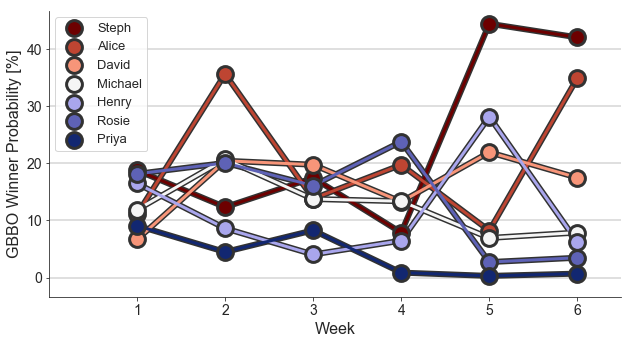

In [24]:
from collections import OrderedDict 

def plot_gbbo_probs(df,prob,ax,colr,lab):
    sns.set_style("white")
    
    for baker in colr:    
        tmp = df.loc[df['baker']==baker]
        
        ax.scatter(x=tmp['episode'],
                   y=tmp[prob],
                   color=colr[baker],
                   edgecolor='#323232', #'#dfdfdf',
                   s=250,
                   linewidth=3,
                   zorder=4,
                   label=baker
                  )
        ax.plot(tmp['episode'],
                tmp[prob],
                color=colr[baker],
                linewidth=3,
                zorder=2,
                label='',
               )
        
        ax.plot(tmp['episode'],
                tmp[prob],
                color='#323232',
                linewidth=6,
                zorder=1,
                label=''
               )
    buff=0.5
    ax.legend(fontsize=13)
    vapeplot.despine(ax)
    ax.set_ylabel(lab,fontsize=16)
    ax.set_xlabel("Week",fontsize=16)
    ax.set_xticks(list(range(1,max(df['episode'])+1)))
    ax.set_xlim(0,max(df['episode'])+buff)
    ax.yaxis.grid(which="major", color='#dfdfdf', linestyle='-', linewidth=2)

        
#col=['#122771', '#4b53a4', '#8483d3', '#bcb8fa', '#f5f5f5', '#fcafac', '#f16569', '#c4232d', '#7f0000']
col=['#122771', '#5e62b6', '#a9a6ed', '#f5f5f5', '#f79579', '#be4532', '#6d0000']
colrs=list(reversed(col))
lost = ['Dan','Jamie','Amelia','Phil','Helena','Michelle']
gbbo=df
gbbo = gbbo.loc[~gbbo['baker'].isin(lost)]
remaining_bakers = len(set(gbbo['baker']))
gbbo = gbbo.sort_values(ascending=False,by=['episode','finalist'])
tmp = gbbo.loc[gbbo['episode']==max(gbbo['episode'])]
bakers = tmp['baker']
colr_dict=OrderedDict()
for x,c in zip(bakers,colrs):
    colr_dict[x]=c

vapeplot.font_size(14)
f,ax = plt.subplots(1,1,figsize=(9,5))

plot_gbbo_probs(gbbo,'finalist',ax,colr_dict,'GBBO Winner Probability [%]')

f.tight_layout()
f.savefig("../FIGURES/gbbo.winner.running.probs.{}.png".format(timestamp()),dpi=500)
f.savefig("../FIGURES/gbbo.winner.running.probs.{}.svg".format(timestamp()),dpi=500)

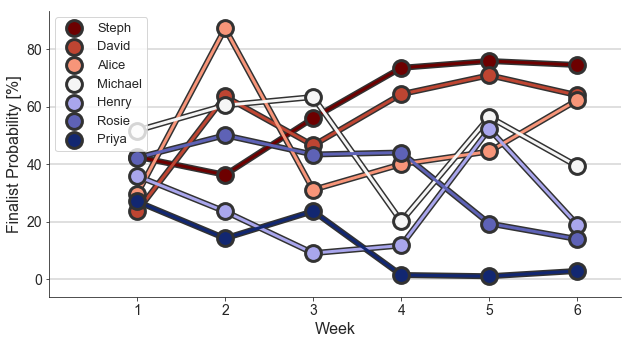

In [17]:
col=['#122771', '#5e62b6', '#a9a6ed', '#f5f5f5', '#f79579', '#be4532', '#6d0000']
colrs=list(reversed(col))
lost = ['Dan','Jamie','Amelia','Phil','Helena','Michelle']
gbbo=df
gbbo = gbbo.loc[~gbbo['baker'].isin(lost)]
remaining_bakers = len(set(gbbo['baker']))
gbbo = gbbo.sort_values(ascending=False,by=['episode','top3'])
tmp = gbbo.loc[gbbo['episode']==max(gbbo['episode'])]
bakers = tmp['baker']
colr_dict=OrderedDict()
for x,c in zip(bakers,colrs):
    colr_dict[x]=c

vapeplot.font_size(14)
f,ax = plt.subplots(1,1,figsize=(9,5))

plot_gbbo_probs(gbbo,'top3',ax,colr_dict,'Finalist Probability [%]')

f.tight_layout()
f.savefig("../FIGURES/gbbo.finalist.running.probs.{}.png".format(timestamp()),dpi=500)
f.savefig("../FIGURES/gbbo.finalist.running.probs.{}.svg".format(timestamp()),dpi=500)

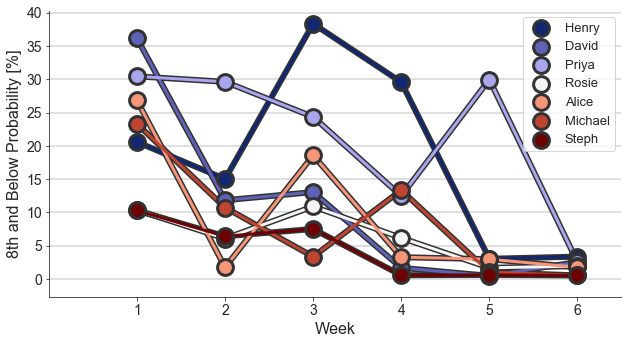

In [25]:
col=['#122771', '#5e62b6', '#a9a6ed', '#f5f5f5', '#f79579', '#be4532', '#6d0000']
colrs=col
#colrs=list(reversed(col))
lost = ['Dan','Jamie','Amelia','Phil','Helena','Michelle']
gbbo=df
gbbo = gbbo.loc[~gbbo['baker'].isin(lost)]
remaining_bakers = len(set(gbbo['baker']))
gbbo = gbbo.sort_values(ascending=False,by=['episode','bottom'])
tmp = gbbo.loc[gbbo['episode']==max(gbbo['episode'])]
bakers = tmp['baker']
colr_dict=OrderedDict()
for x,c in zip(bakers,colrs):
    colr_dict[x]=c

vapeplot.font_size(14)
f,ax = plt.subplots(1,1,figsize=(9,5))

plot_gbbo_probs(gbbo,'bottom',ax,colr_dict,'8th and Below Probability [%]')


f.tight_layout()
f.savefig("../FIGURES/gbbo.bottom.running.probs.{}.png".format(timestamp()),dpi=500)
f.savefig("../FIGURES/gbbo.bottom.running.probs.{}.svg".format(timestamp()),dpi=500)

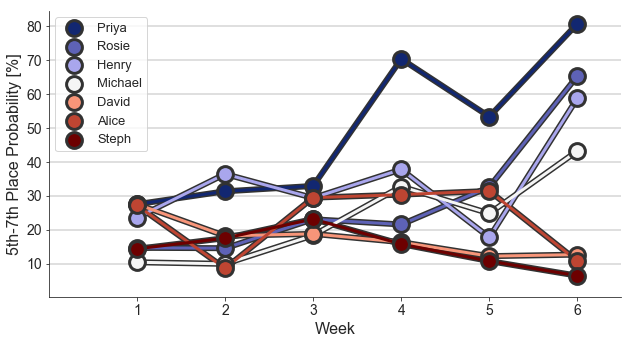

In [23]:
col=['#122771', '#5e62b6', '#a9a6ed', '#f5f5f5', '#f79579', '#be4532', '#6d0000']
colrs=col
#colrs=list(reversed(col))
lost = ['Dan','Jamie','Amelia','Phil','Helena','Michelle']
gbbo=df
gbbo = gbbo.loc[~gbbo['baker'].isin(lost)]
remaining_bakers = len(set(gbbo['baker']))
gbbo = gbbo.sort_values(ascending=False,by=['episode','fifthseventh'])
tmp = gbbo.loc[gbbo['episode']==max(gbbo['episode'])]
bakers = tmp['baker']
colr_dict=OrderedDict()
for x,c in zip(bakers,colrs):
    colr_dict[x]=c

vapeplot.font_size(14)
f,ax = plt.subplots(1,1,figsize=(9,5))

plot_gbbo_probs(gbbo,'fifthseventh',ax,colr_dict,'5th-7th Place Probability [%]')


f.tight_layout()
f.savefig("../FIGURES/gbbo.5th-7th.running.probs.{}.png".format(timestamp()),dpi=500)
f.savefig("../FIGURES/gbbo.5th-7th.running.probs.{}.svg".format(timestamp()),dpi=500)

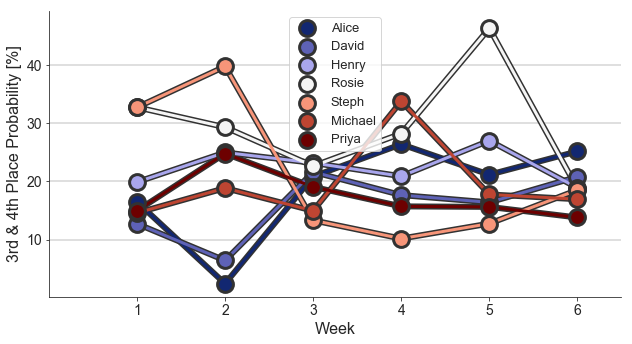

In [26]:
col=['#122771', '#5e62b6', '#a9a6ed', '#f5f5f5', '#f79579', '#be4532', '#6d0000']
colrs=col
#colrs=list(reversed(col))
lost = ['Dan','Jamie','Amelia','Phil','Helena','Michelle']
gbbo=df
gbbo = gbbo.loc[~gbbo['baker'].isin(lost)]
remaining_bakers = len(set(gbbo['baker']))
gbbo = gbbo.sort_values(ascending=False,by=['episode','thirdforth'])
tmp = gbbo.loc[gbbo['episode']==max(gbbo['episode'])]
bakers = tmp['baker']
colr_dict=OrderedDict()
for x,c in zip(bakers,colrs):
    colr_dict[x]=c

vapeplot.font_size(14)
f,ax = plt.subplots(1,1,figsize=(9,5))

plot_gbbo_probs(gbbo,'thirdforth',ax,colr_dict,'3rd & 4th Place Probability [%]')


f.tight_layout()
f.savefig("../FIGURES/gbbo.3rd-4th.running.probs.{}.png".format(timestamp()),dpi=500)
f.savefig("../FIGURES/gbbo.3rd-4th.running.probs.{}.svg".format(timestamp()),dpi=500)

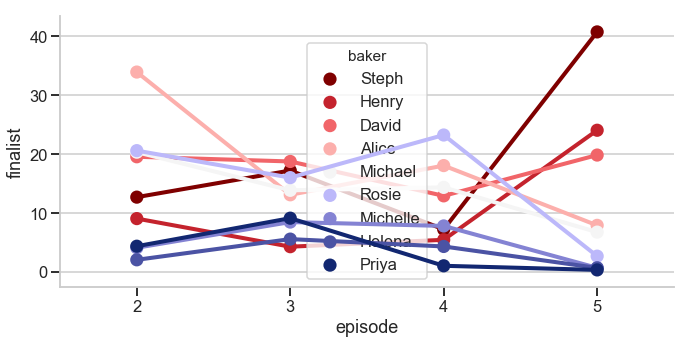

In [53]:
col=['#122771', '#4b53a4', '#8483d3', '#bcb8fa', '#f5f5f5', '#fcafac', '#f16569', '#c4232d', '#7f0000']
colrs=reversed(col)
lost = ['Dan','Jamie','Amelia','Phil']
gbbo=df
gbbo = gbbo.sort_values(ascending=False,by=['episode','finalist'])
gbbo = gbbo.loc[~gbbo['baker'].isin(lost)]
remaining_bakers = len(set(gbbo['baker']))

f,ax = plt.subplots(1,1,figsize=(11,5))

sns.set_style("whitegrid")
#sns.set_context("talk")
#sns.set_style("ticks", {"xtick.major.size": 1, "ytick.major.size": 1})

sns.pointplot(
    x="episode",
    y="finalist",
    hue="baker",
    data=gbbo,
    ax=ax,
    palette=colrs,
    markeredgecolor=2,
    edgecolor='k'

)

vapeplot.despine(ax)

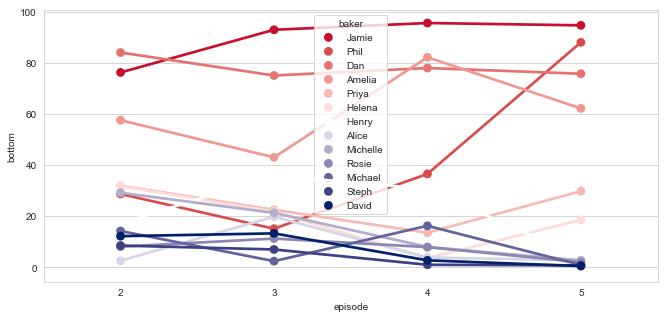

In [37]:
col=['#012169', '#3d4081', '#64629a', '#8b87b2', '#b1adcc', '#d7d5e5', '#ffffff', '#fddcd9', '#f8b9b4', '#f09790', '#e5736d', '#d84c4d', '#c8102e']
colrs=reversed(col)
#lost = ['Dan','Jamie','Amelia','Phil']
#gbbo = gbbo.loc[~gbbo['baker'].isin(lost)]
gbbo=df
gbbo = gbbo.sort_values(ascending=False,by=['episode','bottom'])
remaining_bakers = len(set(gbbo['baker']))

f,ax = plt.subplots(1,1,figsize=(11,5))
sns.pointplot(
    x="episode",
    y="bottom",
    hue="baker",
    data=gbbo,
    ax=ax,
    palette=colrs

)

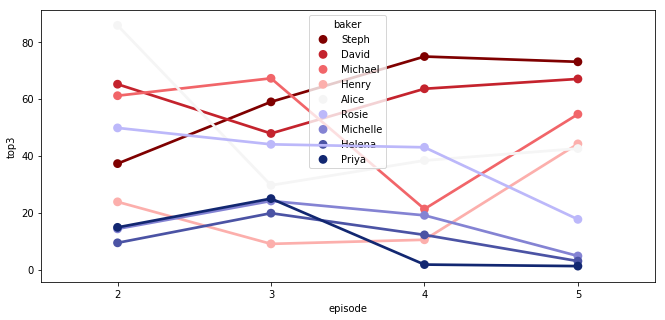

In [24]:
col=['#122771', '#4b53a4', '#8483d3', '#bcb8fa', '#f5f5f5', '#fcafac', '#f16569', '#c4232d', '#7f0000']
colrs=reversed(col)
lost = ['Dan','Jamie','Amelia','Phil']
gbbo=df
gbbo = gbbo.sort_values(ascending=False,by=['episode','top3'])
gbbo = gbbo.loc[~gbbo['baker'].isin(lost)]
remaining_bakers = len(set(gbbo['baker']))

f,ax = plt.subplots(1,1,figsize=(11,5))
sns.pointplot(
    x="episode",
    y="top3",
    hue="baker",
    data=gbbo,
    ax=ax,
    palette=colrs

)